In [52]:
from __future__ import division
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
%matplotlib inline

# parameters
nt=32
# nt =64
N=16
T  = np.linspace(0.8, 4, nt)#temperature range
eqSteps = 1000
mcSteps = 1000 

# monte carlo moves
def mcmove(config, beta,n_potts):
    for i in range(N):
        for j in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                s =  config[a, b]
            
                near_config=[config[(a+1)%N,b],config[a,(b+1)%N],config[(a-1)%N,b],config[a,(b-1)%N]]
                cost=0
                try_s=(s+(2*np.random.randint(2)-1))%n_potts
                for state in near_config:
                    cost+=np.cos(2*np.pi*(s-state)/n_potts)-np.cos(2*np.pi*(try_s-state)/n_potts)    # energy difference by changing s
                if cost < 0 or rand() < np.exp(-cost*beta):
                    s=try_s                       
 
                config[a, b] = s
    return config


# magnetization of  the configuration
# requires future version for n_potts>2 
def calcMag(config,n_potts):
    mag = np.sum(np.cos(2*np.pi*config/n_potts))
    return mag

# Energy calculation
def calcEnergy(config,n_potts):
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = [config[(i+1)%N, j], config[i,(j+1)%N], config[(i-1)%N, j] , config[i,(j-1)%N]]
            for state in nb:                
                energy += -np.cos(2*np.pi*(S-state)/n_potts)
    return energy/2

def simulation(n_potts=2):
    Energy = np.zeros(nt)
    Magnetization = np.zeros(nt)
    SpecificHeat = np.zeros(nt)
    Susceptibility = np.zeros(nt)


    config_table=[]
    for m in range(len(T)):
        E1=E2=0
        M1=M2=0


        # generates a random spin config
        config = np.random.randint(n_potts, size=(N,N))
        
        # equilibrate the system
        for i in range(eqSteps):
            mcmove(config, 1.0/T[m],n_potts)

        print("Equil finished at tempeature", T[m] )       

    # This part does the main calculations and the measurements
        for i in range(mcSteps):
            config=mcmove(config, 1.0/T[m],n_potts)   # monte carlo moves
            if(i%50==0):
                config_line=np.reshape(config,newshape=(1,N*N))
                config_table.append(np.append(config_line,[T[m]])) # lisconfig_line.t and numpy difference of append method
            Ene = calcEnergy(config,n_potts)        # calculate the energy
            Mag = calcMag(config,n_potts)           # calculate the magnetisation

            E1 = E1 + Ene
            M1 = M1 + Mag
            M2 = M2   + Mag*Mag ;
            E2 = E2   + Ene*Ene;

            Energy[m]         = E1/(mcSteps*N*N)
            Magnetization[m]  = M1/(mcSteps*N*N)
            SpecificHeat[m]   = ( E2/mcSteps - E1*E1/(mcSteps*mcSteps) )/(N*T[m]*T[m]);
            Susceptibility[m] = ( M2/mcSteps - M1*M1/(mcSteps*mcSteps) )/(N*T[m]*T[m]);
        print("Sampling finished at tempeature", T[m])
    np.savetxt(''.join(["config_table_add",str(n_potts),".txt"]),config_table)
    return [Energy,SpecificHeat,Magnetization,Susceptibility]

In [53]:
Energy,SpecificHeat,Magnetization,Susceptibility=simulation(n_potts=2)

Equil finished at tempeature 0.8
Sampling finished at tempeature 0.8
Equil finished at tempeature 0.968421052632
Sampling finished at tempeature 0.968421052632
Equil finished at tempeature 1.13684210526
Sampling finished at tempeature 1.13684210526
Equil finished at tempeature 1.30526315789
Sampling finished at tempeature 1.30526315789
Equil finished at tempeature 1.47368421053
Sampling finished at tempeature 1.47368421053
Equil finished at tempeature 1.64210526316
Sampling finished at tempeature 1.64210526316
Equil finished at tempeature 1.81052631579
Sampling finished at tempeature 1.81052631579
Equil finished at tempeature 1.97894736842
Sampling finished at tempeature 1.97894736842
Equil finished at tempeature 2.14736842105
Sampling finished at tempeature 2.14736842105
Equil finished at tempeature 2.31578947368
Sampling finished at tempeature 2.31578947368
Equil finished at tempeature 2.48421052632
Sampling finished at tempeature 2.48421052632
Equil finished at tempeature 2.65263157

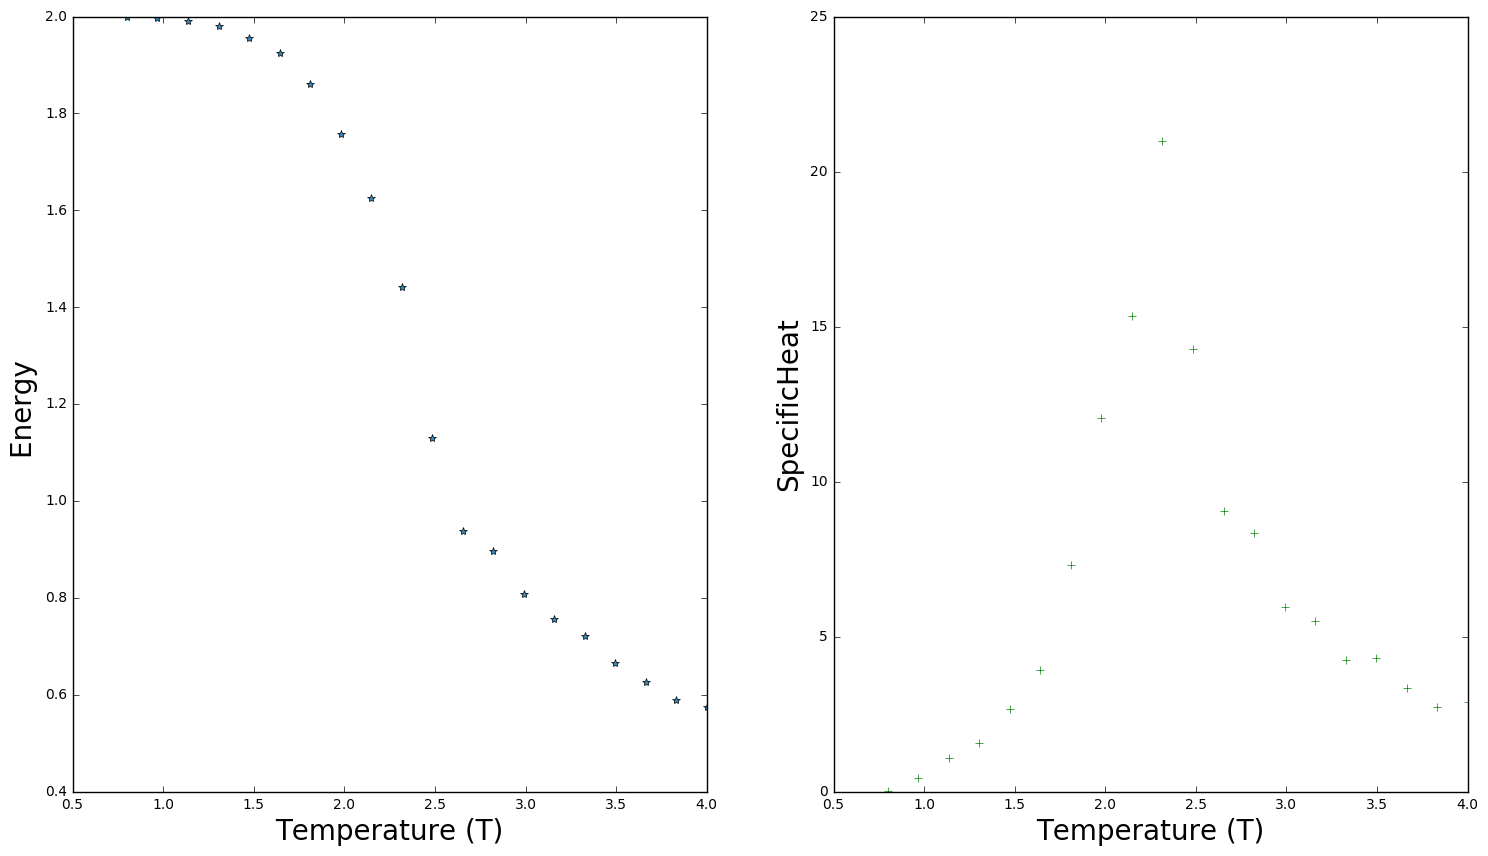

In [55]:
f = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');    

sp =  f.add_subplot(1, 2, 1 );
plt.plot(T, abs(Energy), '*', color="#348ABD", label='Energy');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Energy ", fontsize=20);

sp =  f.add_subplot(1, 2, 2 );
plt.plot(T, SpecificHeat, '+', color="green", label='Specific Heat');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("SpecificHeat", fontsize=20);
plt.show()

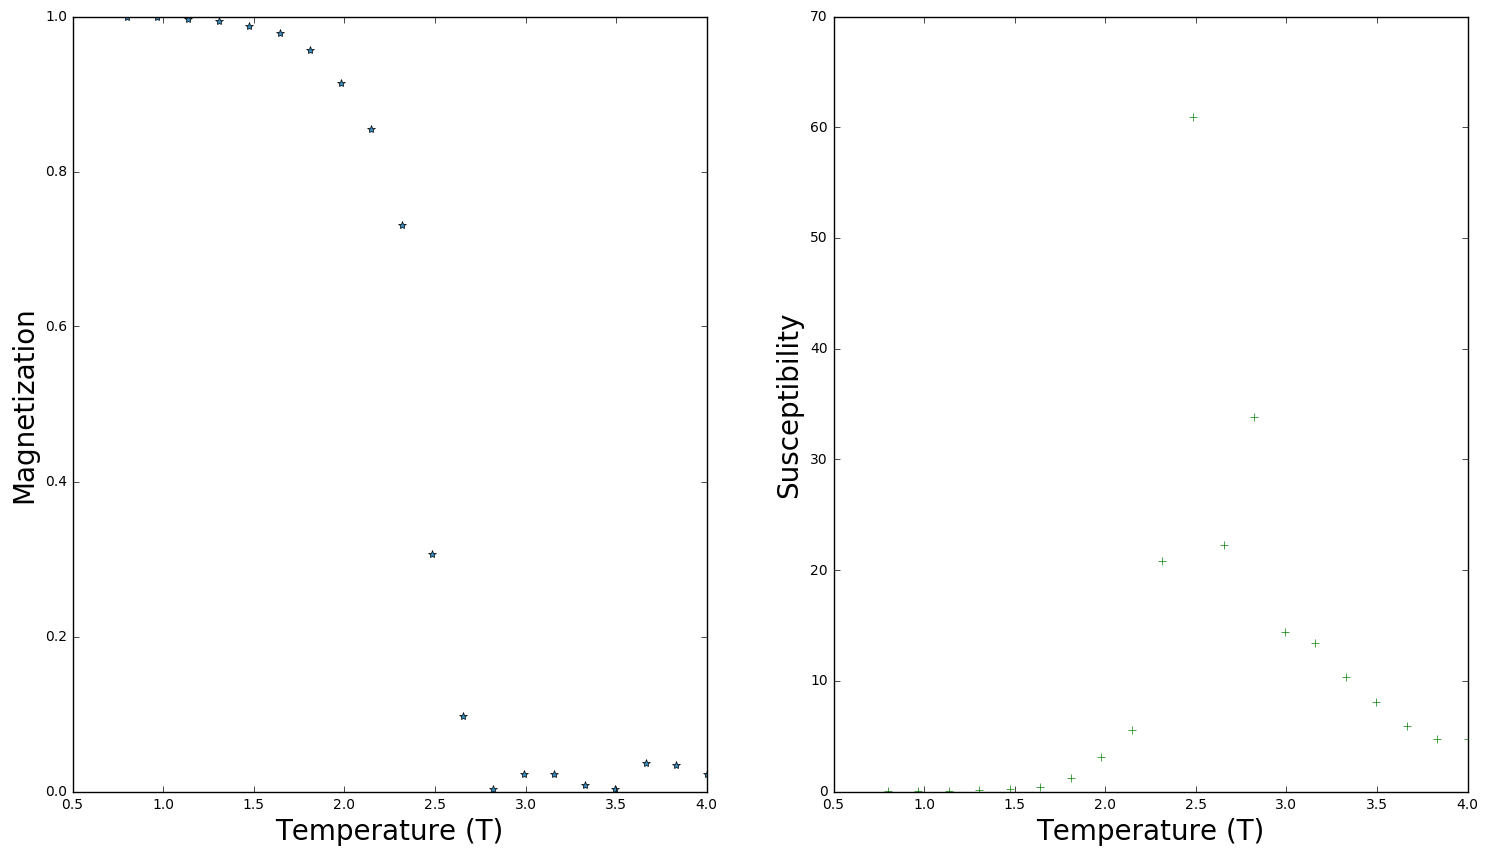

In [56]:
f = plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k');    

sp =  f.add_subplot(1, 2, 1 );
plt.plot(T, abs(Magnetization), '*', color="#348ABD", label='Magnetization');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Magnetization", fontsize=20);

sp =  f.add_subplot(1, 2, 2 );
plt.plot(T, Susceptibility, '+', color="green", label='Susceptibility');
plt.xlabel("Temperature (T)", fontsize=20);
plt.ylabel("Susceptibility", fontsize=20);
plt.show()
#plt.legend(loc='best', fontsize=15); 